<a href="https://colab.research.google.com/github/wzakrzewski/Titanic/blob/main/WZtitanicProjekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wczytujemy zbiór danych i patrzymy jak wygląda za pomocą funkcji info i describe.

In [450]:
import numpy as np
import pandas as pd

df = pd.read_csv('http://analityk.edu.pl/wp-content/uploads/2020/02/titanic.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [451]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Usuwamy nieprzydatne kolumny "cabin", "boat", "body", "home_dest" (zbyt duże braki danych oraz ich nieprzydatność w predykcji przeżywalności katastrofy).

In [452]:
df.drop(columns=["cabin", "boat", "body", "home_dest"], inplace=True)

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


Imię pasażera nie powinno wpływać na analizę, może jednak być istotny jego tytuł, więc z kolumny name otrzymujemy go i tworzymy nową kolumnę title


In [454]:
df['title'] = df['name'].str.split('[,.]').str[1].str.strip()
df['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

Sprawdzimy korelację między poszczególnymi kolmunami a przeżywalnością, by zdecydować czy dana kolumna będzie w zbiorze testowym.


---



<Axes: xlabel='pclass', ylabel='survived'>

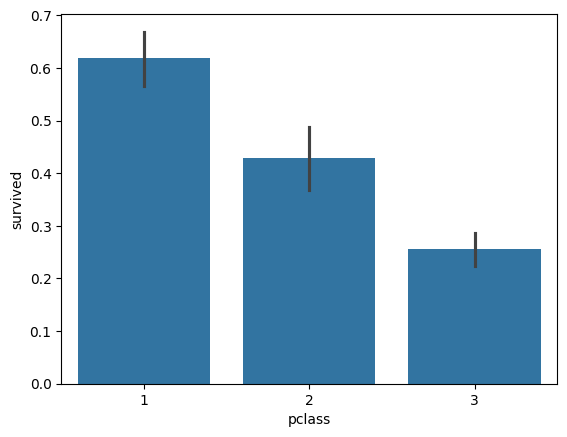

In [455]:
import seaborn as sns
sns.barplot(df, x='pclass', y='survived')

<Axes: xlabel='sex', ylabel='survived'>

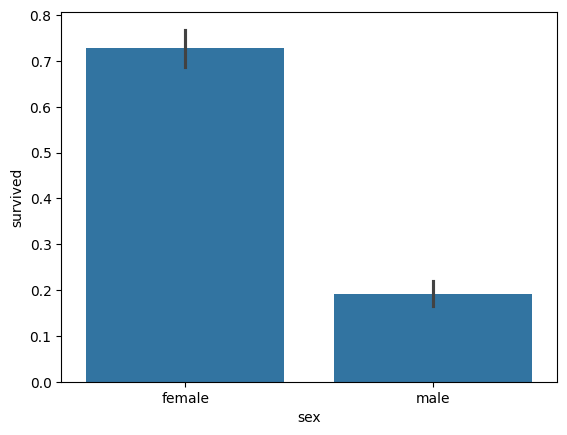

In [456]:
sns.barplot(df, x='sex', y='survived')

<Axes: xlabel='sibsp', ylabel='survived'>

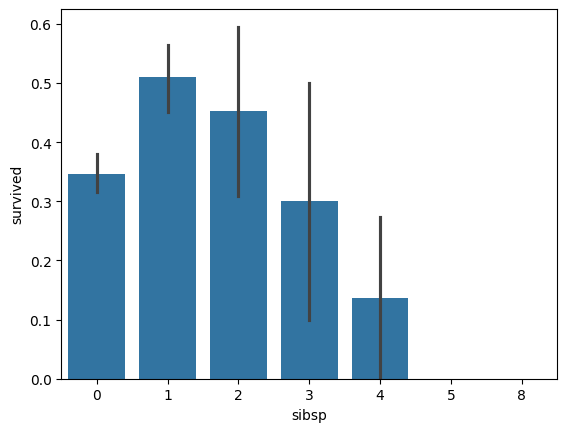

In [457]:
sns.barplot(df, x='sibsp', y='survived')

<Axes: xlabel='parch', ylabel='survived'>

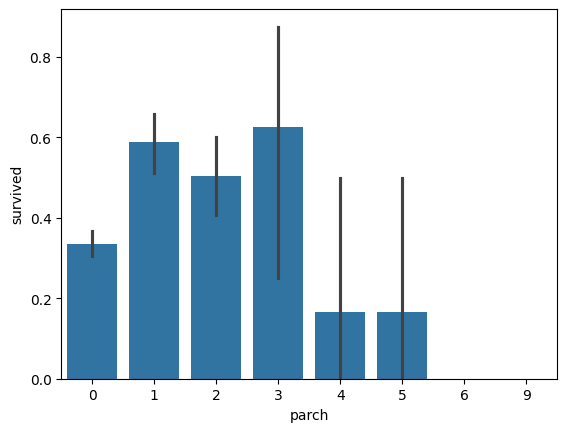

In [458]:
sns.barplot(df, x='parch', y='survived')

<Axes: xlabel='embarked', ylabel='survived'>

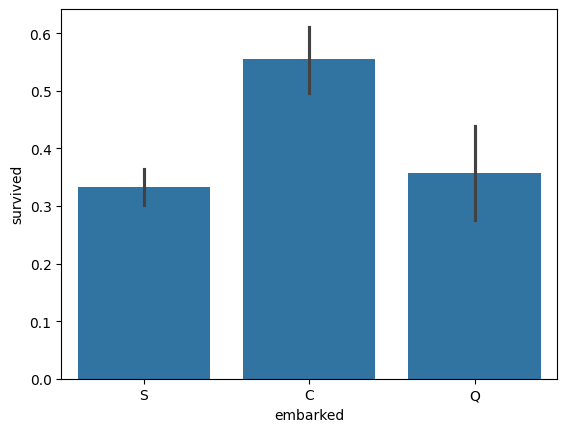

In [459]:
sns.barplot(df, x='embarked', y='survived')

Widzimy, że między testowanymi kolumnami a przeżywalnością występuje znacząca korelacja, więc zostawiamy je.

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
 10  title     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


Uzupełniamy brakujące wartości w kolumnie age średnim wiekiem w zależności od płci i tytułu danego pasażera

In [461]:
means = df.groupby(['sex', 'title'])['age'].transform('mean')
df['age'].fillna(means, inplace=True)
df['age'] = df['age'].round(0)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
 10  title     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


W kolumnach fare i embarked brakuje kolejno jednej i dwóch wartości więc po prostu uzupełniamy je modą.

In [462]:
mode_fare = df['fare'].mode().iloc[0]
df['fare'].fillna(mode_fare, inplace=True)
mode_embarked = df['embarked'].mode().iloc[0]
df['embarked'].fillna(mode_embarked, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1309 non-null   object 
 10  title     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


Dodajemy kolumny przewidziane w projekcie.

In [463]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [464]:
def age_categories(age):
    if age > 18:
        return 'Adult'
    if age > 12:
        return 'Teenager'
    if age > 6:
        return 'Kid'
    return 'Toddler'

df['age_category'] = df['age'].apply(age_categories)
print(df['age_category'].unique())
df['age'] = df['age'].astype(int)

['Adult' 'Toddler' 'Teenager' 'Kid']


In [465]:
df['mpc'] = df['age'] * df['pclass']

In [466]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,family_size,age_category,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,S,Miss,1,Adult,29
1,1,1,"Allison, Master. Hudson Trevor",male,1,1,2,113781,151.5500,S,Master,4,Toddler,1
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,S,Miss,4,Toddler,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,S,Mr,4,Adult,30
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,S,Mrs,4,Adult,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,C,Miss,2,Teenager,42
1305,3,0,"Zabour, Miss. Thamine",female,22,1,0,2665,14.4542,C,Miss,2,Adult,66
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,C,Mr,1,Adult,78
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,C,Mr,1,Adult,81


Zmieniamy kolumny embarked, sex, pclass, survived na zmienne kategoryczne

In [467]:
df['embarked'] = df['embarked'].astype('category')
df['sex'] = df['sex'].astype('category')
df['pclass'] = df['pclass'].astype('category')
df['survived'] = df['survived'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   pclass        1309 non-null   category
 1   survived      1309 non-null   category
 2   name          1309 non-null   object  
 3   sex           1309 non-null   category
 4   age           1309 non-null   int64   
 5   sibsp         1309 non-null   int64   
 6   parch         1309 non-null   int64   
 7   ticket        1309 non-null   object  
 8   fare          1309 non-null   float64 
 9   embarked      1309 non-null   category
 10  title         1309 non-null   object  
 11  family_size   1309 non-null   int64   
 12  age_category  1309 non-null   object  
 13  mpc           1309 non-null   int64   
dtypes: category(4), float64(1), int64(5), object(4)
memory usage: 108.0+ KB


Wszystkie wartości są uzupełnione, możemy więc przejść do przycinania odstających wartości.

In [468]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['survived'])
X = df.drop(columns=['name', 'sibsp', 'parch', 'ticket', 'title'])
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,family_size,age_category,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,S,Miss,1,Adult,29
1,1,1,"Allison, Master. Hudson Trevor",male,1,1,2,113781,151.5500,S,Master,4,Toddler,1
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,S,Miss,4,Toddler,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,S,Mr,4,Adult,30
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,S,Mrs,4,Adult,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,C,Miss,2,Teenager,42
1305,3,0,"Zabour, Miss. Thamine",female,22,1,0,2665,14.4542,C,Miss,2,Adult,66
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,C,Mr,1,Adult,78
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,C,Mr,1,Adult,81


AGE:

<Axes: xlabel='age', ylabel='age'>

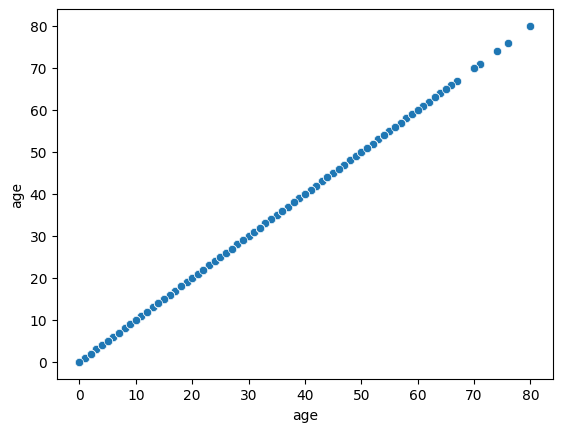

In [469]:
sns.scatterplot(X, x="age", y="age")

W kolumnie age wartości powyżej 67 odstają więc zastępujemy je średnią.

In [470]:
mean = X['age'].mean()
X.loc[X['age'] > 67, 'age'] = mean

<Axes: xlabel='age', ylabel='age'>

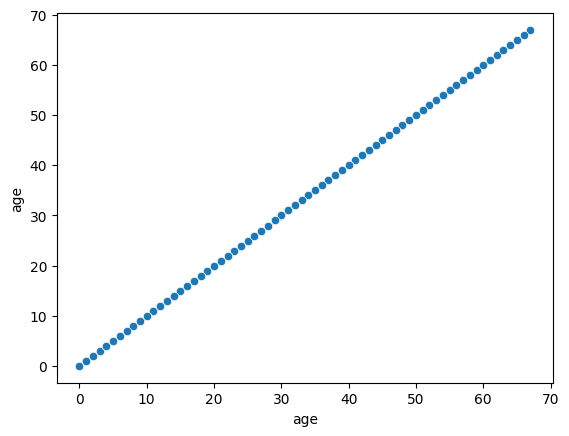

In [471]:
sns.scatterplot(X, x="age", y="age")

FARE:

<Axes: xlabel='fare', ylabel='fare'>

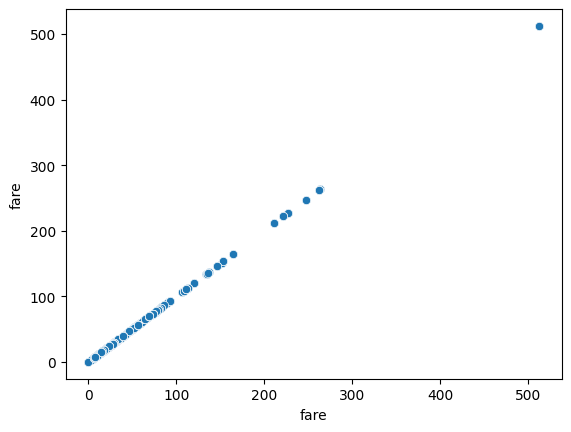

In [472]:
sns.scatterplot(X, x="fare", y="fare")

In [473]:
mean = X['fare'].mean()
X.loc[X['fare'] > 300, 'fare'] = mean

<Axes: xlabel='fare', ylabel='fare'>

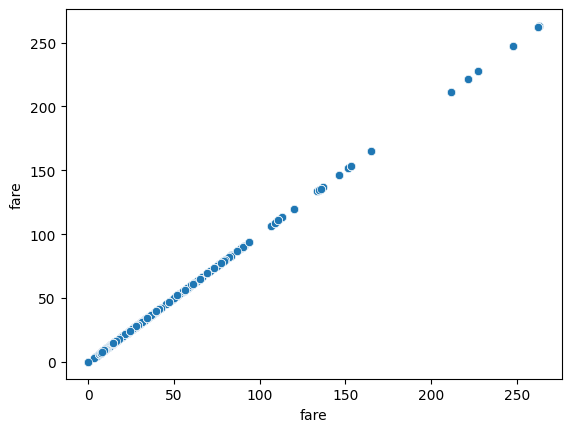

In [474]:
sns.scatterplot(X, x="fare", y="fare")

Przedstawiamy kolumnę sex, age_category, embarked jako kolumny z danymi liczbowymi za pomocą OneHotEncoder

In [475]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(drop='first', sparse_output=False)
sex_norm = one_hot.fit_transform(X[['sex']])
X = pd.concat([X, pd.DataFrame(sex_norm, columns=['is_female'])], axis=1)

In [476]:
age_cat_norm = one_hot.fit_transform(X[['age_category']])
age_cat_norm.shape
X = pd.concat([X, pd.DataFrame(age_cat_norm, columns=['is_adult','is_teenager', 'is_kid'])], axis=1)

In [477]:
embarked_norm = one_hot.fit_transform(X[['embarked']])
X = pd.concat([X, pd.DataFrame(embarked_norm, columns=['is_S', 'is_C'])], axis=1)

Normalizujemy dane liczbowe:

In [478]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   pclass        1309 non-null   category
 1   survived      1309 non-null   category
 2   sex           1309 non-null   category
 3   age           1309 non-null   float64 
 4   fare          1309 non-null   float64 
 5   embarked      1309 non-null   category
 6   family_size   1309 non-null   int64   
 7   age_category  1309 non-null   object  
 8   mpc           1309 non-null   int64   
 9   is_female     1309 non-null   float64 
 10  is_adult      1309 non-null   float64 
 11  is_teenager   1309 non-null   float64 
 12  is_kid        1309 non-null   float64 
 13  is_S          1309 non-null   float64 
 14  is_C          1309 non-null   float64 
dtypes: category(4), float64(8), int64(2), object(1)
memory usage: 118.2+ KB


In [479]:
from sklearn.preprocessing import MinMaxScaler

cols = ['age', 'fare', 'family_size', 'mpc']
X[cols] = MinMaxScaler().fit_transform(X[cols])
X

,pclass,survived,sex,age,fare,embarked,family_size,age_category,mpc,is_female,is_adult,is_teenager,is_kid,is_S,is_C
0,1,1,female,0.432836,0.803565,S,0.0,Adult,0.130631,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,male,0.014925,0.576236,S,0.3,Toddler,0.004505,1.0,0.0,0.0,1.0,0.0,1.0
2,1,0,female,0.029851,0.576236,S,0.3,Toddler,0.009009,0.0,0.0,0.0,1.0,0.0,1.0
3,1,0,male,0.447761,0.576236,S,0.3,Adult,0.135135,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0,female,0.373134,0.576236,S,0.3,Adult,0.112613,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,0.208955,0.054959,C,0.1,Teenager,0.189189,0.0,0.0,1.0,0.0,0.0,0.0
1305,3,0,female,0.328358,0.054959,C,0.1,Adult,0.297297,0.0,0.0,0.0,0.0,0.0,0.0
1306,3,0,male,0.388060,0.027471,C,0.0,Adult,0.351351,1.0,0.0,0.0,0.0,0.0,0.0
1307,3,0,male,0.402985,0.027471,C,0.0,Adult,0.364865,1.0,0.0,0.0,0.0,0.0,0.0


Dzielimy zbiór na dane trenujące i walidujące

In [480]:
X = X.drop(columns=['survived','sex', 'age_category', 'embarked'], axis=1)

In [481]:
X

,pclass,age,fare,family_size,mpc,is_female,is_adult,is_teenager,is_kid,is_S,is_C
0,1,0.432836,0.803565,0.0,0.130631,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.014925,0.576236,0.3,0.004505,1.0,0.0,0.0,1.0,0.0,1.0
2,1,0.029851,0.576236,0.3,0.009009,0.0,0.0,0.0,1.0,0.0,1.0
3,1,0.447761,0.576236,0.3,0.135135,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0.373134,0.576236,0.3,0.112613,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0.208955,0.054959,0.1,0.189189,0.0,0.0,1.0,0.0,0.0,0.0
1305,3,0.328358,0.054959,0.1,0.297297,0.0,0.0,0.0,0.0,0.0,0.0
1306,3,0.388060,0.027471,0.0,0.351351,1.0,0.0,0.0,0.0,0.0,0.0
1307,3,0.402985,0.027471,0.0,0.364865,1.0,0.0,0.0,0.0,0.0,0.0


In [482]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Wybrany model - MLPClassifier

In [483]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)
y_pred = mlpc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix dla MLPC

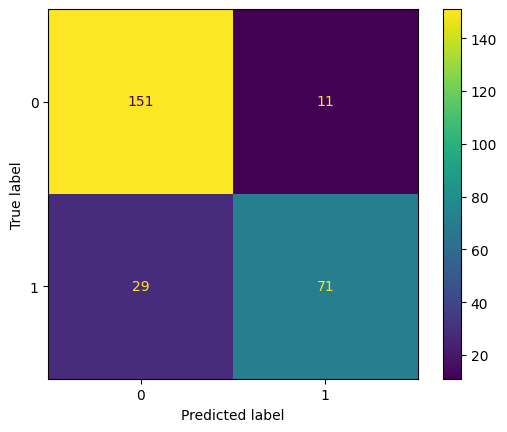

In [484]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_test).plot()

In [485]:
accuracy

0.8473282442748091

Dokładność wynosi około 80%, więc model jest skończony.